<a href="https://colab.research.google.com/github/jinnyjinny/DogFaceClassification/blob/master/landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Face Detection and Landmark - 함수형 아님

- GPU 가속기에서 코드 실행 (CPU에서 실행 불가)

In [ ]:
!pip install face_recognition

In [ ]:
import keras
import tensorflow as tf
import dlib, cv2, os 
from imutils import face_utils 
import numpy as np
import matplotlib.pyplot as plt
import os

##### Load Model #####
detector = dlib.cnn_face_detection_model_v1('/content/drive/My Drive/Cap/dogHeadDetector.dat')
predictor = dlib.shape_predictor('/content/drive/My Drive/Cap/landmarkDetector.dat')

##### Load Image #####
total_folder_path = '/content/drive/My Drive/Cap/data/real/train'
total_folder_list = os.listdir(total_folder_path)

for f in total_folder_list:
    folder_path = total_folder_path + '/' + f
    print("Processing: " + f)
    file_list = os.listdir(folder_path)
    file_list.sort()

    for f in file_list:
        img_path = folder_path + '/' + f
        img = cv2.imread(img_path)
        index = str(f.split('.')[0]) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ##### Detect Face #####
        dets = detector(img, upsample_num_times=1)
        img_result = img.copy()

        for i, d in enumerate(dets):
            #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
            x1, y1 = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()
            cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
        
        ##### Detect Landmarks #####
        for i, d in enumerate(dets):
            shape = predictor(img, d.rect) # detect in range of d.rect 
            shape = face_utils.shape_to_np(shape)
            reshape = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5 
            print(index,reshape)
            # print("Image Index{}: Landmarks: {}".format(i, reshape))

Using TensorFlow backend.


Processing: zzo
zzo_1 [268  85 341 119 327 242 275 356 187 100 205 225]
zzo_2 [155 115 177 124 180 170 145 206 126 113 122 163]
zzo_3 [202  76 247  94 210 151 140 197 158  88 147 144]
zzo_4 [236 192 262 202 235 232 176 259 213 195 193 227]
zzo_5 [315  75 361  86 354 147 315 201 267  78 269 141]
Processing: hugi
hugi_1 [534 162 633 183 597 334 538 401 440 184 465 336]
hugi_2 [441 119 521 167 457 260 392 293 353 130 365 228]
hugi_3 [516 251 604 287 551 376 490 405 423 267 445 359]
hugi_4 [287 149 423 166 392 281 313 374 179 231 240 340]
hugi_5 [408 345 448 358 432 407 412 435 367 355 384 404]
Processing: jeolmi
jeolmi_2 [234  48 287  50 293 120 271 182 182  62 204 131]
jeolmi_3 [269  17 355  49 324  96 248 150 186  55 211  99]
jeolmi_4 [243  51 294  56 294 142 265 216 189  57 205 146]
jeolmi_5 [440   7 580  56 577 192 565 279 274  35 379 176]


# Visualized Sample Image


Detection 0: Left: 147 Top: -5 Right: 391 Bottom: 240 Confidence: 1.03592848777771


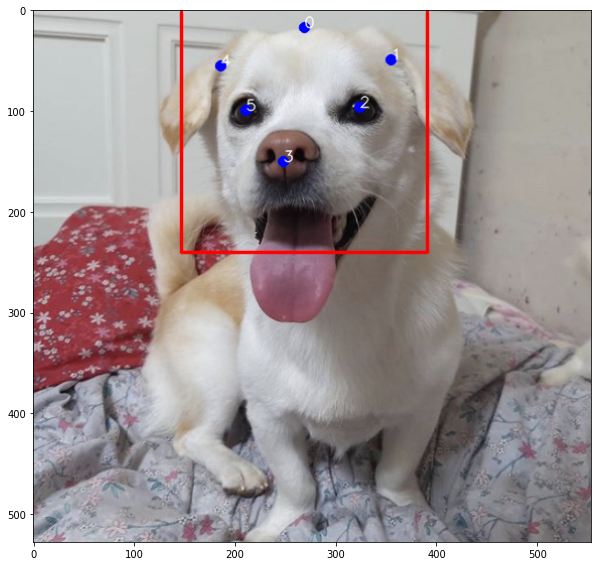

In [ ]:
img_path = '/content/drive/My Drive/Cap/data/real/train/jeolmi/jeolmi_3.png'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect Face
dets = detector(img, upsample_num_times=1)
img_result = img.copy()

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)

# Detect Landmarks
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    re = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5     
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=5, color=(0,0,255), thickness=-5, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 10))
plt.imshow(img_result)

# 전체 폴더 탐색 - 함수형


In [3]:
import keras
import tensorflow as tf
import dlib, cv2, os 
from imutils import face_utils 
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import os

def total_folder_landmark(TOTAL_FOLDER_PATH):
  
    ##### Load Model #####
    detector = dlib.cnn_face_detection_model_v1('/content/drive/My Drive/Cap/dogHeadDetector.dat')
    predictor = dlib.shape_predictor('/content/drive/My Drive/Cap/landmarkDetector.dat')

    ##### Load Image #####
    total_folder_path = TOTAL_FOLDER_PATH
    total_folder_list = os.listdir(total_folder_path)

    for f in total_folder_list:
        folder_path = total_folder_path + '/' + f
        # print("Processing: " + f)
        file_list = os.listdir(folder_path)
        file_list.sort()

        landmarks = []
        for f in file_list:
            img_path = folder_path + '/' + f
            img = cv2.imread(img_path)
            index = str(f.split('.')[0]) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            ##### Detect Face #####
            dets = detector(img, upsample_num_times=1)
            img_result = img.copy()

            for i, d in enumerate(dets):
                #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
                x1, y1 = d.rect.left(), d.rect.top()
                x2, y2 = d.rect.right(), d.rect.bottom()
                cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
            
            
            ##### Detect Landmarks #####
            for i, d in enumerate(dets):
                shape = predictor(img, d.rect) # detect in range of d.rect 
                shape = face_utils.shape_to_np(shape)
                shape = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5 
                # print("Image Index{}: Landmarks: {}".format(i, shape))
                print(index,shape)

    return shape

In [4]:
TOTAL_FOLDER_PATH = '/content/drive/My Drive/Cap/data/real/train'

train_folder_landmark = total_folder_landmark(TOTAL_FOLDER_PATH)

zzo_1 [268  85 341 119 327 242 275 356 187 100 205 225]
zzo_2 [155 115 177 124 180 170 145 206 126 113 122 163]
zzo_3 [202  76 247  94 210 151 140 197 158  88 147 144]
zzo_4 [236 192 262 202 235 232 176 259 213 195 193 227]
zzo_5 [315  75 361  86 354 147 315 201 267  78 269 141]
hugi_1 [534 162 633 183 597 334 538 401 440 184 465 336]
hugi_2 [441 119 521 167 457 260 392 293 353 130 365 228]
hugi_3 [516 251 604 287 551 376 490 405 423 267 445 359]
hugi_4 [287 149 423 166 392 281 313 374 179 231 240 340]
hugi_5 [408 345 448 358 432 407 412 435 367 355 384 404]
jeolmi_2 [234  48 287  50 293 120 271 182 182  62 204 131]
jeolmi_3 [269  17 355  49 324  96 248 150 186  55 211  99]
jeolmi_4 [243  51 294  56 294 142 265 216 189  57 205 146]
jeolmi_5 [440   7 580  56 577 192 565 279 274  35 379 176]


# 특정 폴더 탐색 - 함수형

In [9]:
import keras
import tensorflow as tf
import dlib, cv2, os 
from imutils import face_utils # imutils : 이미지  처리, dlib shape -> numpy ndarray로 자동변환
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import os

def each_folder_landmark(DOG_FOLDER_PATH):

    ##### Load Model #####
    detector = dlib.cnn_face_detection_model_v1('/content/drive/My Drive/Cap/dogHeadDetector.dat')
    predictor = dlib.shape_predictor('/content/drive/My Drive/Cap/landmarkDetector.dat')

    ##### Load Image #####
    dog_folder_path = DOG_FOLDER_PATH
    dog_folder_list = os.listdir(dog_folder_path)
    dog_folder_list.sort()
    

    for f in dog_folder_list:
        img_path = dog_folder_path + '/' + f
        img = cv2.imread(img_path)
        index = str(f.split('.')[0]) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ##### Detect Face #####
        dets = detector(img, upsample_num_times=1)
        img_result = img.copy()

        for i, d in enumerate(dets):
            #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
            x1, y1 = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()
            cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
        
        
        ##### Detect Landmarks #####
        for i, d in enumerate(dets):
            shape = predictor(img, d.rect) # detect in range of d.rect 
            shape = face_utils.shape_to_np(shape)
            shape = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5 
            # print("Image Index{}: Landmarks: {}".format(i, shape))
            print(index,shape)
            
            
    return shape

In [10]:
DOG_FOLDER_PATH = '/content/drive/My Drive/Cap/data/real/train/zzo'
# FOLDER_PATH = '/content/drive/My Drive/Cap/data/real/train/zzo'

zzo_folder_landmark = each_folder_landmark(DOG_FOLDER_PATH)
# train_landmark = face_landmark(shape,MAIN_FOLDER_PATH)

zzo_1 [268  85 341 119 327 242 275 356 187 100 205 225]
zzo_2 [155 115 177 124 180 170 145 206 126 113 122 163]
zzo_3 [202  76 247  94 210 151 140 197 158  88 147 144]
zzo_4 [236 192 262 202 235 232 176 259 213 195 193 227]
zzo_5 [315  75 361  86 354 147 315 201 267  78 269 141]
